In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Data Processing

In [276]:
data = pd.read_csv('/content/Netflix_Userbase.csv')

missing_values = data.isnull().sum()
data.replace('N/A', np.nan, inplace=True)

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

data['Feedback'] = np.where(data['Monthly Revenue'] > 0, 1, 0)

X = data.drop(['User ID', 'Join Date', 'Subscription Type', 'Last Payment Date', 'Country', 'Device', 'Feedback', 'Plan Duration'], axis=1)
y = data['Monthly Revenue']

# 2. Exploratory Data Analysis (EDA)

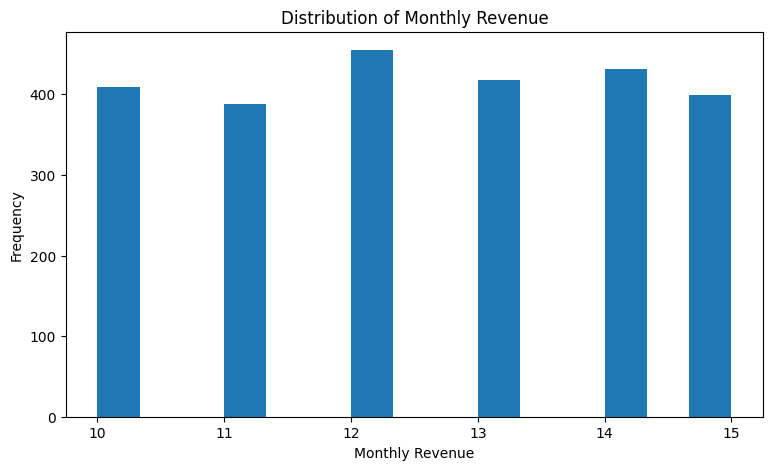

,User ID,Monthly Revenue,Age,Gender,Feedback
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.0
mean,1250.50000,12.508400,38.795600,0.502800,1.0
std,721.83216,1.686851,7.171778,0.500092,0.0
min,1.00000,10.000000,26.000000,0.000000,1.0
25%,625.75000,11.000000,32.000000,0.000000,1.0
50%,1250.50000,12.000000,39.000000,1.000000,1.0
75%,1875.25000,14.000000,45.000000,1.000000,1.0
max,2500.00000,15.000000,51.000000,1.000000,1.0


In [277]:
plt.figure(figsize=(9,5))
plt.hist(data['Monthly Revenue'], bins=15)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

data.describe()

# 3. Linear Regression Model (Predicting Monthly Revenue)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

r_squared = linear_model.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Linear Regression Model Evaluation:")
print(f"R-squared: {r_squared}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Linear Regression Model Evaluation:
R-squared: 1.0
Root Mean Squared Error (RMSE): 2.547075201979243e-15


# 4. Logistic Regression Model (Predicting Customer Feedback)

In [279]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(multi_class='auto', solver='liblinear')
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)[1]
recall = recall_score(y_test, y_pred, average=None)[1]
f1 = f1_score(y_test, y_pred, average=None)[1]
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Model Evaluation:
Accuracy: 0.87
Precision: 1.0
Recall: 0.759493670886076
F1-score: 0.8633093525179857
Confusion Matrix:
[[85  0  0  0  0  0]
 [ 0 60 19  0  0  0]
 [ 0  0 77 16  0  0]
 [ 0  0 30 58  0  0]
 [ 0  0  0  0 85  0]
 [ 0  0  0  0  0 70]]


# 5. Comparative Analysis and Visualization

In [280]:
coefficients = linear_model.coef_
feature_names = X.columns

feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("Feature Importance in Linear Regression Model:")
print(feature_importance_lr)

Feature Importance in Linear Regression Model:
           Feature   Coefficient
0  Monthly Revenue  1.000000e+00
1              Age  4.582888e-17
2           Gender  1.484112e-16


In [281]:
coefficients = logistic_model.coef_[0]
feature_names = X.columns

feature_importance_logreg = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("Feature Importance in Logistic Regression Model:")
print(feature_importance_logreg)

Feature Importance in Logistic Regression Model:
           Feature  Coefficient
0  Monthly Revenue    -7.617900
1              Age     0.069440
2           Gender     0.069897
